6666.66666666667*Integral(exp(0.0481*t)*exp(-0.0166666666666667*cos(1.5*t)), (t, 30))


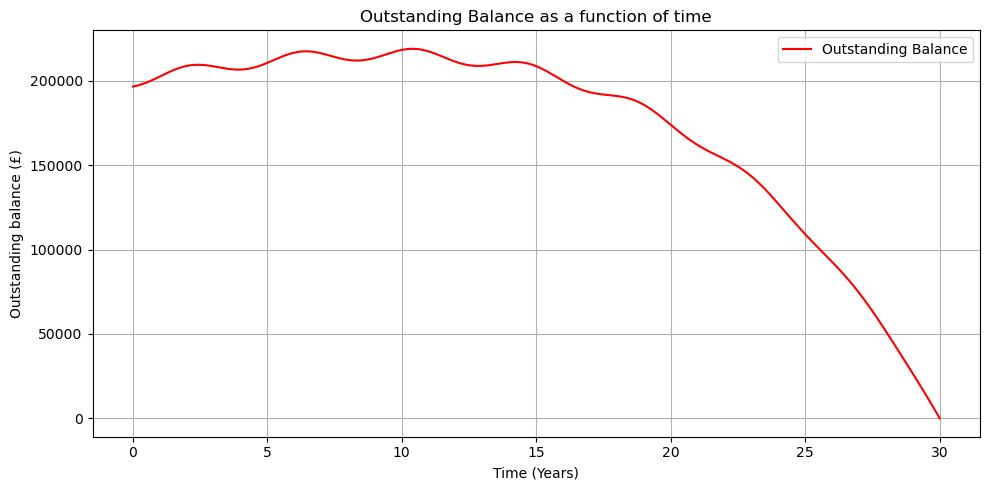

In [12]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbolic variable
t = sp.Symbol('t')
B_0, T_T = sp.symbols('B_0, T_T')

alpha = 0.025 * sp.sin(1.5 * t) + 0.0481  # Define alpha (intrest rate)

# Integrate symbolically
alpha_int = sp.integrate(alpha, t).doit()

# Convert to a callable function
alpha_int_callable = sp.lambdify(t, alpha_int, 'numpy')

# define constants

T = 30
B0 = 200000

def rCalc(t):
    return (B0/T) * np.exp(alpha_int_callable(t))

#rSym = (B_0/T_T) * sp.exp(alpha_int)
rSym = (B0/T) * sp.exp(alpha_int)

BSym = sp.exp(alpha_int) * (B_0 - sp.integrate(rSym * sp.exp(-1 * alpha_int), t))

BNum = sp.lambdify((t, B_0, T_T), BSym, 'numpy')

rSymint = sp.integrate(rSym, t).doit()

evaluated_expr = rSymint.subs(t, 30).evalf()


print(evaluated_expr)

T_array = np.linspace(0, 30, 1000)

r_Vals = rCalc(T_array)
B_Vals = BNum(T_array, B0, T)


#print(B_Vals)
plt.figure(figsize=(10, 5))
plt.plot(T_array, B_Vals, color='r', label="Outstanding Balance")

# Adding labels and title
plt.xlabel('Time (Years)')
plt.ylabel('Outstanding balance (£)')
plt.title('Outstanding Balance as a function of time')
plt.legend()

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.savefig('Outstanding Balance as a function of time (200k mortage over 30 years oscilating intrest.jpg')
plt.show()



    
